In [1]:
import fairlib

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load experimental results

In [3]:
Moji_results = fairlib.analysis.retrive_results("Moji", log_dir="../analysis/results")
Bios_results = fairlib.analysis.retrive_results("Bios_gender", log_dir="../analysis/results")
Bios_intersection_results = fairlib.analysis.retrive_results("Bios_both", log_dir="../analysis/results")

In [4]:
Moji_results["Standard"] = Moji_results["Vanilla"]
Moji_results["ADAdv"] = Moji_results["GatedDAdv"]
Moji_results["FairBatch"] = Moji_results["OldFairBatch"]
Moji_results["EO$_{CLA}$"] = Moji_results["GDEO"]


In [5]:
Moji_plot_df = fairlib.analysis.final_results_df(
    results_dict = Moji_results,
    model_order=["Standard", "BTEO", "Adv", "DAdv", "ADAdv", "FairBatch", "FairSCL", "EO$_{CLA}$", "INLP"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    )

## Basic Plot

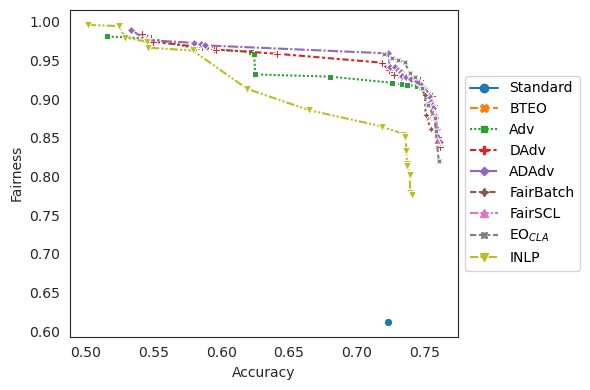

In [6]:
def make_plot(plot_df, figure_name=None):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Accuracy"] = plot_df["test_performance mean"]

    figure = plt.figure(dpi = 100) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Accuracy",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    if figure_name is not None:
        figure.savefig(Path(r"plots") / figure_name, dpi=960, bbox_inches="tight") 


make_plot(Moji_plot_df)

## Zoomed Plots

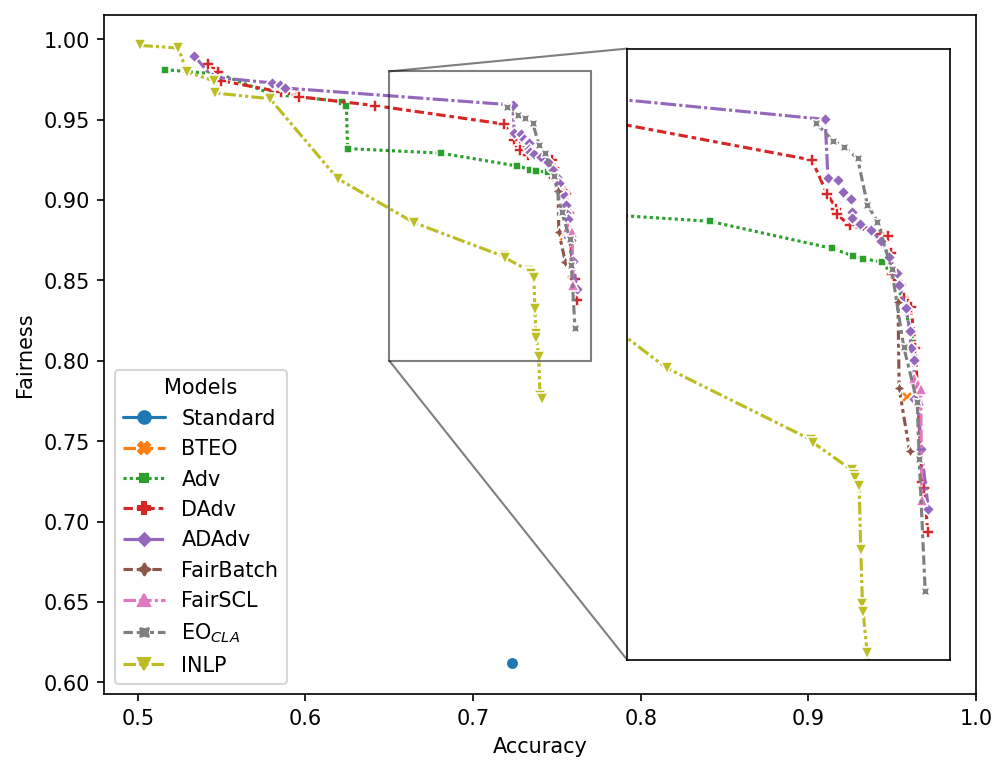

In [7]:
fairlib.analysis.utils.make_zoom_plot(
    Moji_plot_df,
    xlim=(0.48,1.0),
    zoom_xlim=(0.65,0.77),
    zoom_ylim=(0.8,0.98),
    # figure_name = "moji_fairlib"
    )

## AUC - Performance-Fairness Tradeoff

(0.8888970059716558, 0.9854552013667007)

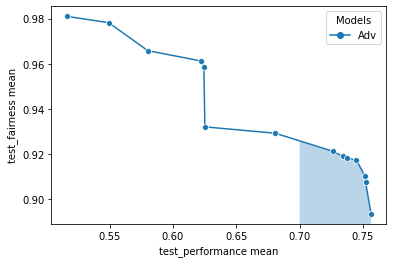

In [8]:
adv_pareto_df = Moji_plot_df[Moji_plot_df["Models"]=="Adv"]

image = sns.lineplot(
            data=adv_pareto_df,
            x="test_performance mean",
            y="test_fairness mean",
            hue="Models",
            markers=True,
            style="Models",
        )

_xlim = image.axes.get_xlim()
_ylim = image.axes.get_ylim()

_tmp_df = fairlib.analysis.utils.auc_performance_fairness_tradeoff(
    adv_pareto_df,
    # random_performance = 0.5,
    performance_threshold = 0.70, 
    # interpolation = "constant",
    interpolation = "linear",
    )[1]

plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"],  alpha=0.30)

plt.xlim(_xlim)
plt.ylim(_ylim)

In [9]:
fairlib.analysis.utils.auc_performance_fairness_tradeoff(
    adv_pareto_df,
    # random_performance = 0.5,
    performance_threshold = 0.70, 
    # interpolation = "constant",
    interpolation = "linear",
    )[0]

0.051836936857947394